# Loading data

In [1]:
# importing librabries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading data
df_train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df_test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [3]:
# inspecting loaded data
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df_train.drop("Loan_ID", axis = 1, inplace = True)

In [6]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
df_test.drop("Loan_ID", axis = 1, inplace = True)

In [8]:
# inspecting size of the dataset
df_train.shape

(614, 12)

In [9]:
df_test.shape

(367, 11)

## Data Types

In [10]:
df_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
df_test.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [12]:
df_train["Dependents"] = df_train["Dependents"].str.strip("+")
df_test["Dependents"] = df_test["Dependents"].str.strip("+")

In [13]:
df_train["Dependents"] = pd.to_numeric(df_train["Dependents"]).astype("Int32")
df_test["Dependents"] = pd.to_numeric(df_test["Dependents"]).astype("Int32")

In [14]:
df_train['ApplicantIncome'] = pd.to_numeric(df_train["ApplicantIncome"], downcast='float')
df_test['ApplicantIncome'] = pd.to_numeric(df_test["ApplicantIncome"], downcast='float')

In [15]:
df_test['CoapplicantIncome'] = pd.to_numeric(df_test["CoapplicantIncome"], downcast='float')

In [16]:
df_train["Credit_History"] = df_train["Credit_History"].astype("Int32")
df_test["Credit_History"] = df_test["Credit_History"].astype("Int32")

In [17]:
df_train["Credit_History"] = df_train["Credit_History"].fillna(-1).astype(str).replace('-1', np.nan)
df_test["Credit_History"] = df_test["Credit_History"].fillna(-1).astype(str).replace('-1', np.nan)

In [18]:
df_train.dtypes

Gender                object
Married               object
Dependents             Int32
Education             object
Self_Employed         object
ApplicantIncome      float32
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [19]:
df_test.dtypes

Gender                object
Married               object
Dependents             Int32
Education             object
Self_Employed         object
ApplicantIncome      float32
CoapplicantIncome    float32
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
dtype: object

In [20]:
for column in df_train:
    col = df_train[column]
    if col.dtype == 'object':
        print(col.value_counts(), end = '\n\n')

Male      489
Female    112
Name: Gender, dtype: int64

Yes    398
No     213
Name: Married, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

No     500
Yes     82
Name: Self_Employed, dtype: int64

1    475
0     89
Name: Credit_History, dtype: int64

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Y    422
N    192
Name: Loan_Status, dtype: int64



In [21]:
for column in df_test:
    col = df_test[column]
    if col.dtype == 'object':
        print(col.value_counts(), end = '\n\n')

Male      286
Female     70
Name: Gender, dtype: int64

Yes    233
No     134
Name: Married, dtype: int64

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

No     307
Yes     37
Name: Self_Employed, dtype: int64

1    279
0     59
Name: Credit_History, dtype: int64

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64



## Plotting Graph

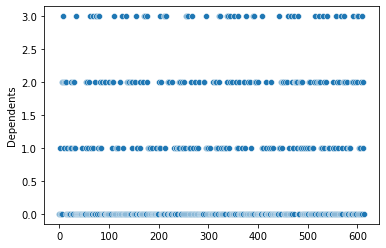

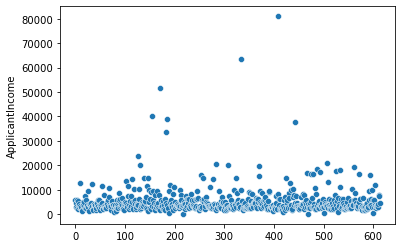

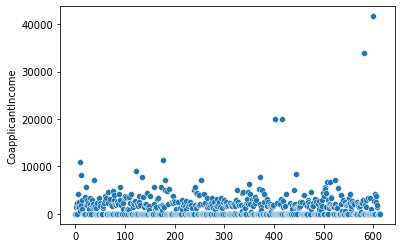

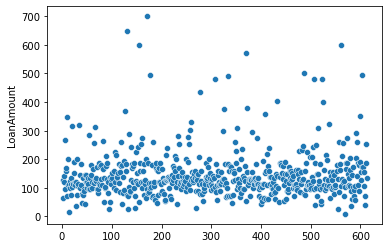

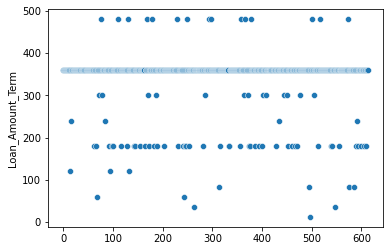

In [22]:
for column in df_train:
    col = df_train[column]
    if col.dtype == 'object':
        pass
    else:
        sns.scatterplot(x=range(df_train.shape[0]), y = col)
        plt.show()

## Handling Outliers

In [23]:
df_train = df_train[df_train["ApplicantIncome"] < 15000]

In [24]:
df_train = df_train[df_train['CoapplicantIncome'] < 6000]

In [25]:
df_train = df_train[df_train['LoanAmount'] < 350]

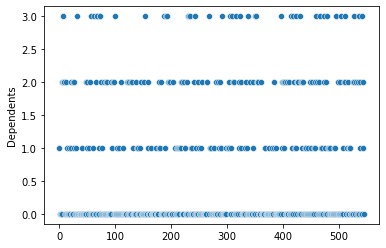

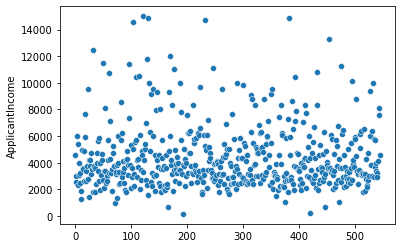

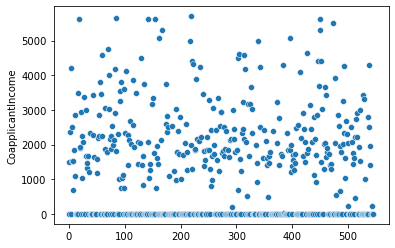

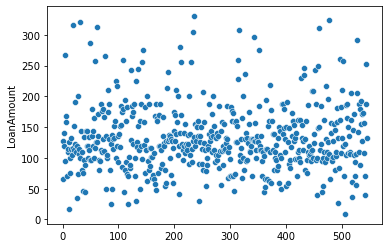

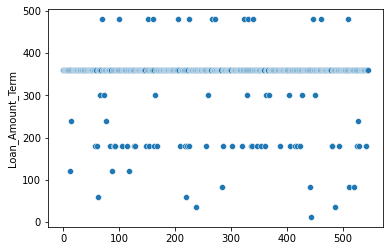

In [26]:
for column in df_train:
    col = df_train[column]
    if col.dtype == 'object':
        pass
    else:
        sns.scatterplot(x=range(df_train.shape[0]), y = col)
        plt.show()

In [27]:
df_train.shape

(546, 12)

# Handling Missing values

In [28]:
df_train.isnull().sum()

Gender               10
Married               2
Dependents           13
Education             0
Self_Employed        28
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       45
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
df_test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [30]:
# filling missing values in training data

df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace = True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace = True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace = True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace = True)
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mode()[0], inplace = True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace = True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace = True)

In [31]:
# filling missing values in test data

df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace = True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace = True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace = True)
df_test['LoanAmount'].fillna(df_test['LoanAmount'].median(), inplace = True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0], inplace = True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0], inplace = True)

In [32]:
df_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
df_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

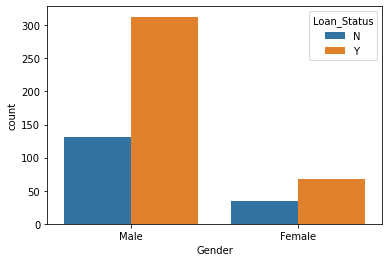

In [34]:
sns.countplot(x = "Gender", data = df_train, hue = "Loan_Status")

<AxesSubplot:xlabel='Married', ylabel='count'>

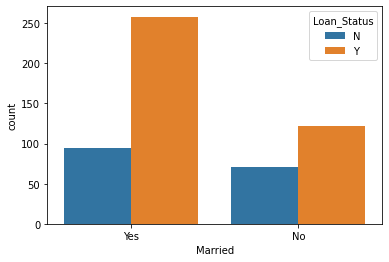

In [35]:
sns.countplot(x = "Married", data = df_train, hue = "Loan_Status")

<AxesSubplot:xlabel='Dependents', ylabel='count'>

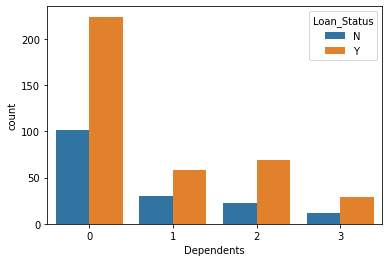

In [36]:
sns.countplot(x = "Dependents", data = df_train, hue = "Loan_Status")

<AxesSubplot:xlabel='Education', ylabel='count'>

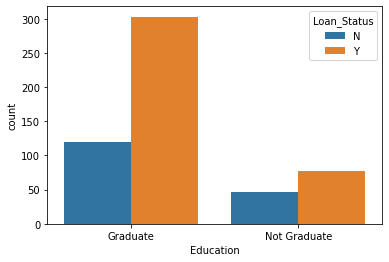

In [37]:
sns.countplot(x = "Education", data = df_train, hue = "Loan_Status")

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

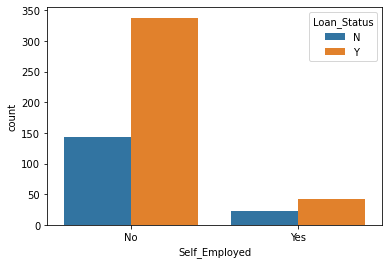

In [38]:
sns.countplot(x = "Self_Employed", data = df_train, hue = "Loan_Status")

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

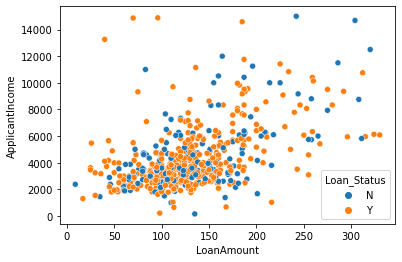

In [39]:
sns.scatterplot(x = 'LoanAmount', y = 'ApplicantIncome', data = df_train, hue = 'Loan_Status')

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

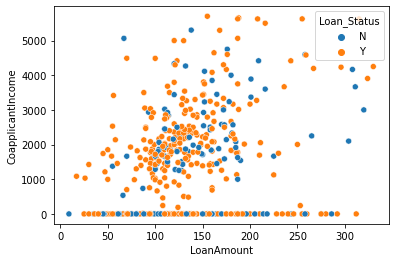

In [40]:
sns.scatterplot(x = 'LoanAmount', y = 'CoapplicantIncome', data = df_train, hue = 'Loan_Status')

<AxesSubplot:ylabel='LoanAmount'>

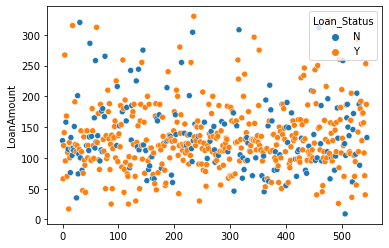

In [41]:
sns.scatterplot(x = range(df_train.shape[0]), y = 'LoanAmount', data = df_train, hue = 'Loan_Status')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

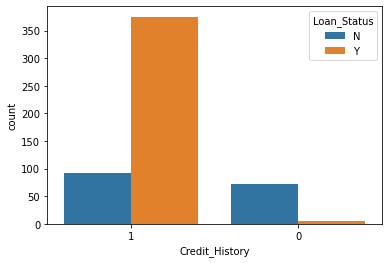

In [42]:
sns.countplot(x = "Credit_History", data = df_train, hue = "Loan_Status")

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

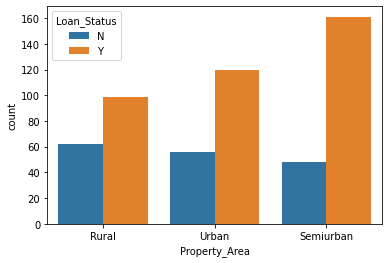

In [43]:
sns.countplot(x = "Property_Area", data = df_train, hue = "Loan_Status")

In [44]:
status_counts = df_train['Loan_Status'].value_counts()
print("Percentage of Y: ", end = '')
print( round((status_counts[0] / (status_counts[0] + status_counts[1]) * 100),2)  )
print("Percentage of N: ", end = '')
print( round((status_counts[1] / (status_counts[0] + status_counts[1]) * 100),2)  )

Percentage of Y: 69.6
Percentage of N: 30.4


# Feature Selection

### Categorical Variables

In [45]:
# separating categorical column
df_train_cat = df_train[['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area' ]]
df_test_cat = df_test[['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area' ]]

In [46]:
df_train_cat.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area
1,Male,Yes,Graduate,No,1,Rural
2,Male,Yes,Graduate,Yes,1,Urban
3,Male,Yes,Not Graduate,No,1,Urban
4,Male,No,Graduate,No,1,Urban
5,Male,Yes,Graduate,Yes,1,Urban


In [47]:
Xtrain_cat = df_train_cat.values
Xtest_cat = df_test_cat.values

In [48]:
print((Xtrain_cat.shape[1]))

6


In [49]:
# label encoding categorical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(Xtrain_cat.shape[1]):
    Xtrain_cat[:,i] = le.fit_transform(Xtrain_cat[:,i])
    Xtest_cat[:,i] = le.transform(Xtest_cat[:,i])

In [50]:
print(Xtrain_cat)

[[1 1 0 0 1 0]
 [1 1 0 1 1 2]
 [1 1 1 0 1 2]
 ...
 [1 1 0 0 1 2]
 [1 1 0 0 1 2]
 [0 0 0 1 0 1]]


In [51]:
print(Xtest_cat)

[[1 1 0 0 1 2]
 [1 1 0 0 1 2]
 [1 1 0 0 1 2]
 ...
 [1 0 0 0 1 1]
 [1 1 0 0 1 0]
 [1 0 0 1 1 0]]


In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder= 'passthrough')
Xtrain_cat = np.array(ct.fit_transform(Xtrain_cat))
Xtest_cat = np.array(ct.transform(Xtest_cat))

In [53]:
print(Xtrain_cat)

[[1.0 0.0 0.0 ... 0 0 1]
 [0.0 0.0 1.0 ... 0 1 1]
 [0.0 0.0 1.0 ... 1 0 1]
 ...
 [0.0 0.0 1.0 ... 0 0 1]
 [0.0 0.0 1.0 ... 0 0 1]
 [0.0 1.0 0.0 ... 0 1 0]]


In [54]:
print(Xtest_cat)

[[0.0 0.0 1.0 ... 0 0 1]
 [0.0 0.0 1.0 ... 0 0 1]
 [0.0 0.0 1.0 ... 0 0 1]
 ...
 [0.0 1.0 0.0 ... 0 0 1]
 [1.0 0.0 0.0 ... 0 0 1]
 [1.0 0.0 0.0 ... 0 1 1]]


### Numerical Variables

In [55]:
# separating numerical column
df_train_num = df_train[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
df_test_num = df_test[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]

In [56]:
df_train_num.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
1,1,4583.0,1508.0,128.0,360.0
2,0,3000.0,0.0,66.0,360.0
3,0,2583.0,2358.0,120.0,360.0
4,0,6000.0,0.0,141.0,360.0
5,2,5417.0,4196.0,267.0,360.0


In [57]:
Xtrain_num = df_train_num.values
Xtest_num = df_test_num.values

In [58]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in range(Xtrain_num.shape[1]):
    Xtrain_num = sc.fit_transform(Xtrain_num)
    Xtest_num = sc.transform(Xtest_num)

In [59]:
print(Xtrain_num)

[[ 0.28226236  0.07602562  0.12144524 -0.08055034  0.26368752]
 [-0.72502685 -0.58371644 -0.91674199 -1.22770649  0.26368752]
 [-0.72502685 -0.75750825  0.70663035 -0.22857049  0.26368752]
 ...
 [ 0.28226236  1.53012544 -0.75151325  2.23226447  0.26368752]
 [ 1.28955157  1.32632641 -0.91674199  1.01109825  0.26368752]
 [-0.72502685  0.07602562 -0.91674199  0.01196225  0.26368752]]


In [60]:
print(Xtest_num)

[[-0.72502685  0.54988962 -0.91674199 -0.41359568  0.26368752]
 [ 0.28226236 -0.55204215  0.11593762 -0.11755538  0.26368752]
 [ 1.28955157  0.24981743  0.32247354  1.39965114  0.26368752]
 ...
 [-0.72502685 -0.4795247   0.45534498 -0.11755538  0.26368752]
 [-0.72502685  0.24981743  0.73072621  0.47452521  0.26368752]
 [-0.72502685  2.00023854 -0.91674199 -0.6356259  -2.50503149]]


### Merging

In [61]:
# merging
train_data = pd.concat([pd.DataFrame(Xtrain_cat), pd.DataFrame(Xtrain_num)], axis = 1)
test_data = pd.concat([pd.DataFrame(Xtest_cat), pd.DataFrame(Xtest_num)], axis = 1)

In [62]:
train_data.head()

,0,1,2,3,4,5,6,7,0,1,2,3,4
0,1,0,0,1,1,0,0,1,0.282262,0.076026,0.121445,-0.080550,0.263688
1,0,0,1,1,1,0,1,1,-0.725027,-0.583716,-0.916742,-1.227706,0.263688
2,0,0,1,1,1,1,0,1,-0.725027,-0.757508,0.706630,-0.228570,0.263688
3,0,0,1,1,0,0,0,1,-0.725027,0.666584,-0.916742,0.159982,0.263688
4,0,0,1,1,1,0,1,1,1.289552,0.423609,1.972007,2.491300,0.263688


In [63]:
# storing values to build model
X = train_data.values
Y = df_train.iloc[:,-1].values

In [64]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [65]:
# storing values which will be used to predict
prediction_data = test_data.values

In [66]:
# splitting dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42 )

## Logistic Regression Model

In [67]:
# training the logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [68]:
Y_pred = classifier.predict(X_test)

In [69]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[12 16]
 [ 2 80]]


0.8363636363636363

In [70]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 20)
print('Accuracy:', round(accuracies.mean()*100, 2), '%')
print('Standard Deviation:', round(accuracies.std()*100, 2), '%')

Accuracy: 81.0 %
Standard Deviation: 6.74 %


In [71]:
prediction = classifier.predict(prediction_data)
print(prediction)
np.count_nonzero(prediction == 0)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


62

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


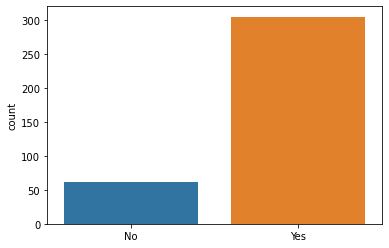

In [72]:
sns.countplot(prediction)
plt.xticks([0,1],['No', 'Yes'])
plt.show()

## Decision Tree Classification Model

In [73]:
# training the decision tree classification model on the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [74]:
Y_pred = classifier.predict(X_test)

In [75]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(Y_test, Y_pred))
accuracy_score(Y_test, Y_pred)

[[17 11]
 [18 64]]


0.7363636363636363

In [76]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 20)
print('Accuracy:', round(accuracies.mean()*100, 2), '%')
print('Standard Deviation:', round(accuracies.std()*100, 2), '%')

Accuracy: 71.13 %
Standard Deviation: 7.68 %


In [77]:
prediction = classifier.predict(prediction_data)
np.count_nonzero(prediction == 0)

128

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


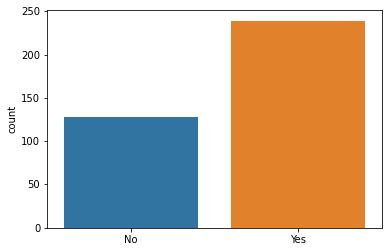

In [78]:
sns.countplot(prediction)
plt.xticks([0,1],['No', 'Yes'])
plt.show()

## Random Forest Classification Model

In [79]:
# training the random forest classification model on the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion= "entropy", random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [80]:
Y_pred = classifier.predict(X_test)

In [81]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(Y_test, Y_pred))
accuracy_score(Y_test, Y_pred)

[[15 13]
 [ 7 75]]


0.8181818181818182

In [82]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 20)
print('Accuracy:', round(accuracies.mean()*100, 2), '%')
print('Standard Deviation:', round(accuracies.std()*100, 2), '%')

Accuracy: 78.43 %
Standard Deviation: 8.18 %


In [83]:
prediction = classifier.predict(prediction_data)
np.count_nonzero(prediction == 0)

103

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


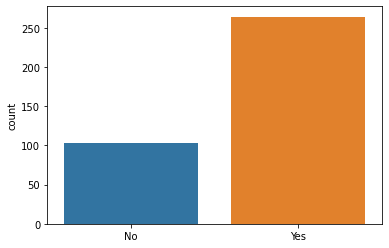

In [84]:
sns.countplot(prediction)
plt.xticks([0,1],['No', 'Yes'])
plt.show()

## random forest with hyperparameters

In [85]:
# training the random forest classification model on the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion= "gini", max_depth=6, min_samples_split = 8, random_state=0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(Y_test, Y_pred))
accuracy_score(Y_test, Y_pred)

[[14 14]
 [ 1 81]]


0.8636363636363636

In [88]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 20)
print('Accuracy:', round(accuracies.mean()*100, 2), '%')
print('Standard Deviation:', round(accuracies.std()*100, 2), '%')

Accuracy: 81.69 %
Standard Deviation: 6.86 %


In [86]:
prediction = classifier.predict(prediction_data)
np.count_nonzero(prediction == 0)

68

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


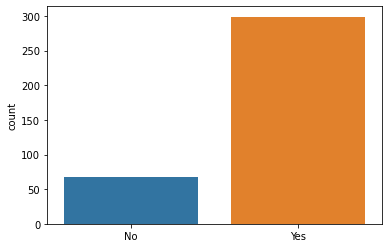

In [87]:
sns.countplot(prediction)
plt.xticks([0,1],['No', 'Yes'])
plt.show()